In [86]:
library("ape")
library("rentrez")
library("seqinr")
library("XML")


Attaching package: ‘ape’


The following object is masked from ‘package:Biostrings’:

    complement


The following objects are masked from ‘package:seqinr’:

    as.alignment, consensus




In [59]:
retrieveseqs <- function(db,accessions) {
    require("rentrez")
    require("seqinr")
    require("XML")
    res_xml <- entrez_fetch(db=db, id=accessions, rettype="fasta",retmode="XML")
    res_list <- xmlToList(res_xml)
    names(res_list) <- accessions
    res_seq <- lapply(res_list,`[[`,'TSeq_sequence')
    res_vec <- lapply(res_seq,function(seq) s2c(seq))
    return(res_vec)
}

In [60]:
seqnames <- c("P06747", "P0C569", "O56773", "Q5VKP1")
seqs <- retrieveseqs("protein",seqnames)

In [61]:
length(seqs)

[1] 4

In [62]:
seq1 <- seqs[[1]]

In [63]:
seq1[1:20]

[1] "M" "S" "K" "I" "F" "V" "N" "P" "S" "A" "I" "R" "A" "G" "L" "A" "D" "L" "E"
[20] "M"

In [64]:
seq2 <- seqs[[2]]

In [65]:
seq2[1:20]

[1] "M" "S" "K" "D" "L" "V" "H" "P" "S" "L" "I" "R" "A" "G" "I" "V" "E" "L" "E"
[20] "M"

In [27]:
res_vec <- sapply(res_seq,function(seq) tolower(s2c(seq)))

In [68]:
write.fasta(seqs,seqnames,file="phosphoproteins.fasta")

### Reading a multiple sequence alignment file into R

In [69]:
virusaln  <- read.alignment(file = "phosphoproteins.phy", format = "phylip")

In [71]:
virusaln[['seq']]

[[1]]
[1] "mskslihpsdlragladiemadetvdlvyknlsegqahlqgepfdikdlpegvsklqisdnvrsdtspneysdeddeegedeyeevydpvsafqdfldetgsylisklkkgekikktwsevsrviysyvmsnfpprppkpttkdiavqadlkk-pneiq-kisehksksepsprepvvemh-----kh---atlenpeddegaleseiahqvaesyskkykfpskssgiflwnfeqlkmnlddivqvargvpgisqiverggklplrcmlgyvgletskrfrslvnqdklcklmqedlnaysvssnn----"

[[2]]
[1] "mskifvnpsairagladlemaeetvdlinrniednqahlqgepievdnlpedmgrlhlddgkspnpgemakvgegkyredfqmdegedpsllfqsyldnvgvqivrqirsgerflkiwsqtveeiisyvavnfpnppgkss-edkstqttgrelkkettptpsqresq------sskarmaaqtasgppalewsatneeddlsveaeiahqiaesfskkykfpsrssgillynfeqlkmnlddivkeaknvpgvtrlardgsklplrcvlgwvalanskkfqllvesnklskimqddlnrytsc-------"

[[3]]
[1] "mskdlvhpsliragivelemaeettdlinrtiesnqahlqgeplyvdslpedmsrlriedksrrtkteeeerdegsseednylsegqdplipfqnfldeigaravkrlktgegffrvwsalsddikgyvstnimtsgerdt-ksiqiqteptas--vssgnesrhdsesmhdpndk--kdhtpdhdvvpdiesstdk-geirdiegevahqvaesfskkykfpsrssgiflwnfeqlkmnlddivkaamnvpgveriaekggklplrcilgfvaldsskrfrlladndkvarliqedinsymarleeae--"

[[4]]
[1] "mskglihpsairsglvdlemaeetvdlvhknladsqahlqgeplnvdslpedmrkmrltnapsereiieedeeeyssedeyylsqgqdpmvpfqnfldelgtqivrrmksgdgffkiwsaasedikgyvlstfmkpetqat-vskptqtdslsvprpsqgytsvp----rdkpsnsesqgggvkpkkvqksewtrdt-deisdiegevahqvaesfskkykfpsrssgiflwnfeqlkmnlddivktsmnvpgvdkiaekggklplrcilgfvsldsskrfrlladtdkvarlmqddihnymtrieeidhn"

In [72]:
printMultipleAlignment <- function(alignment, chunksize=60) {
     # this function requires the Biostrings package
     require("Biostrings")
     # find the number of sequences in the alignment
     numseqs <- alignment$nb
     # find the length of the alignment
     alignmentlen <- nchar(alignment$seq[[1]])
     starts <- seq(1, alignmentlen, by=chunksize)
     n <- length(starts)
     # get the alignment for each of the sequences:
     aln <- vector()
     lettersprinted <- vector()
     for (j in 1:numseqs)
     {
        alignmentj <- alignment$seq[[j]]
        aln[j] <- alignmentj
        lettersprinted[j] <- 0
     }
     # print out the alignment in blocks of 'chunksize' columns:
     for (i in 1:n) { # for each of n chunks
        for (j in 1:numseqs)
        {
           alnj <- aln[j]
           chunkseqjaln <- substring(alnj, starts[i], starts[i]+chunksize-1)
           chunkseqjaln <- toupper(chunkseqjaln)
           # Find out how many gaps there are in chunkseqjaln:
           gapsj <- countPattern("-",chunkseqjaln) # countPattern() is from Biostrings package
           # Calculate how many residues of the first sequence we have printed so far in the alignment:
           lettersprinted[j] <- lettersprinted[j] + chunksize - gapsj
           print(paste(chunkseqjaln,lettersprinted[j]))
        }
        print(paste(' '))
     }
  }

In [73]:
printMultipleAlignment(virusaln, 60)

Loading required package: Biostrings

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


[1] "MSKSLIHPSDLRAGLADIEMADETVDLVYKNLSEGQAHLQGEPFDIKDLPEGVSKLQISD 60"
[1] "MSKIFVNPSAIRAGLADLEMAEETVDLINRNIEDNQAHLQGEPIEVDNLPEDMGRLHLDD 60"
[1] "MSKDLVHPSLIRAGIVELEMAEETTDLINRTIESNQAHLQGEPLYVDSLPEDMSRLRIED 60"
[1] "MSKGLIHPSAIRSGLVDLEMAEETVDLVHKNLADSQAHLQGEPLNVDSLPEDMRKMRLTN 60"
[1] " "
[1] "NVRSDTSPNEYSDEDDEEGEDEYEEVYDPVSAFQDFLDETGSYLISKLKKGEKIKKTWSE 120"
[1] "GKSPNPGEMAKVGEGKYREDFQMDEGEDPSLLFQSYLDNVGVQIVRQIRSGERFLKIWSQ 120"
[1] "KSRRTKTEEEERDEGSSEEDNYLSEGQDPLIPFQNFLDEIGARAVKRLKTGEGFFRVWSA 120"
[1] "APSEREIIEEDEEEYSSEDEYYLSQGQDPMVPFQNFLDELGTQIVRRMKSGDGFFKIWSA 120"
[1] " "
[1] "VSRVIYSYVMSNFPPRPPKPTTKDIAVQADLKK-PNEIQ-KISEHKSKSEPSPREPVVEM 178"
[1] "TVEEIISYVAVNFPNPPGKSS-EDKSTQTTGRELKKETTPTPSQRESQ------SSKARM 173"
[1] "LSDDIKGYVSTNIMTSGERDT-KSIQIQTEPTAS--VSSGNESRHDSESMHDPNDK--KD 175"
[1] "ASEDIKGYVLSTFMKPETQAT-VSKPTQTDSLSVPRPSQGYTSVP----RDKPSNSESQG 175"
[1] " "
[1] "H-----KH---ATLENPEDDEGALESEIAHQVAESYSKKYKFPSKSSGIFLWNFEQLKMN 230"
[1] "AAQTASGPPALEWSATNEEDDLSVEAEIAHQIAESFSKKYKFPSRSSGILLY

In [74]:
cleanAlignment <- function(alignment, minpcnongap, minpcid) {
     # make a copy of the alignment to store the new alignment in:
     newalignment <- alignment
     # find the number of sequences in the alignment
     numseqs <- alignment$nb
     # empty the alignment in "newalignment")
     for (j in 1:numseqs) { newalignment$seq[[j]] <- "" }
     # find the length of the alignment
     alignmentlen <- nchar(alignment$seq[[1]])
     # look at each column of the alignment in turn:
     for (i in 1:alignmentlen)
     {
        # see what percent of the letters in this column are non-gaps:
        nongap <- 0
        for (j in 1:numseqs)
        {
           seqj <- alignment$seq[[j]]
           letterij <- substr(seqj,i,i)
           if (letterij != "-") { nongap <- nongap + 1}
        }
        pcnongap <- (nongap*100)/numseqs
        # Only consider this column if at least minpcnongap % of the letters are not gaps:
        if (pcnongap >= minpcnongap)
        {
           # see what percent of the pairs of letters in this column are identical:
           numpairs <- 0; numid <- 0
           # find the letters in all of the sequences in this column:
           for (j in 1:(numseqs-1))
           {
              seqj <- alignment$seq[[j]]
              letterij <- substr(seqj,i,i)
              for (k in (j+1):numseqs)
              {
                 seqk <- alignment$seq[[k]]
                 letterkj <- substr(seqk,i,i)
                 if (letterij != "-" && letterkj != "-")
                 {
                    numpairs <- numpairs + 1
                    if (letterij == letterkj) { numid <- numid + 1}
                 }
              }
           }
           pcid <- (numid*100)/(numpairs)
           # Only consider this column if at least %minpcid of the pairs of letters are identical:
           if (pcid >= minpcid)
           {
               for (j in 1:numseqs)
               {
                  seqj <- alignment$seq[[j]]
                  letterij <- substr(seqj,i,i)
                  newalignmentj <- newalignment$seq[[j]]
                  newalignmentj <- paste(newalignmentj,letterij,sep="")
                  newalignment$seq[[j]] <- newalignmentj
               }
           }
        }
     }
     return(newalignment)
  }

In [75]:
cleanedvirusaln <- cleanAlignment(virusaln, 30, 30)

In [76]:
printMultipleAlignment(cleanedvirusaln)

[1] "MSKLIHPSLRAGLADIEMADETVDLVKNLQAHLQGEPIKLPEGVKLIDREEEEEVDPFQF 60"
[1] "MSKFVNPSIRAGLADLEMAEETVDLIRNIQAHLQGEPVDLPEDMRLLDSAERDEGDPFQY 60"
[1] "MSKLVHPSIRAGIVELEMAEETTDLIRTIQAHLQGEPVDLPEDMRLIDREEEDEGDPFQF 60"
[1] "MSKLIHPSIRSGLVDLEMAEETVDLVKNLQAHLQGEPVDLPEDMKMLNSEEEEQGDPFQF 60"
[1] " "
[1] "LDEGIKGEIKWSSISYVNFPTDIQAP-SSSP-AEDEEIAHQVAESYSKKYKFPSKSSGIF 118"
[1] "LDNGVRGEFKWSVISYVNFPSDKQTKPSS--PEEDEEIAHQIAESFSKKYKFPSRSSGIL 118"
[1] "LDEGVKGEFRWSSIGYVNIMTSIQT-GSSSPPE-EEEVAHQVAESFSKKYKFPSRSSGIF 118"
[1] "LDEGVKGDFKWSSIGYVTFMTSKQTPGS--PQE-EEEVAHQVAESFSKKYKFPSRSSGIF 117"
[1] " "
[1] "LWNFEQLKMNLDDIVQAGVPGIIVEGGKLPLRCLGVLSKRFRSLVDKLKLMQEDLNYNN 178"
[1] "LYNFEQLKMNLDDIVKANVPGVLARGSKLPLRCLGVLSKKFQLLVNKLKIMQDDLNY-- 176"
[1] "LWNFEQLKMNLDDIVKANVPGVIAEGGKLPLRCLGVLSKRFRLLADKVRLIQEDINYEE 178"
[1] "LWNFEQLKMNLDDIVKSNVPGVIAEGGKLPLRCLGVLSKRFRLLADKVRLMQDDIHYEE 177"
[1] " "


In [77]:
virusdist <- dist.alignment(virusaln) 

In [78]:
virusdist

           Q5VKP1     P06747     P0C569    
P06747      0.5008703                      
P0C569      0.4762396  0.4644927           
O56773      0.5177270  0.4673650  0.3964727

### DNA/mRNA sequences

In [79]:
seqnames <- c("AF049118", "AF049114", "AF049119", "AF049115")  

In [80]:
seqs <- retrieveseqs("nuccore",seqnames)          

In [82]:
write.fasta(seqs, seqnames, file="virusmRNA.fasta")

In [84]:
virusmRNAaln  <- read.alignment(file = "virusmRNA.phy", format = "phylip")

In [87]:
virusmRNAalnbin <- as.DNAbin(virusmRNAaln) # Convert the alignment to "DNAbin" format
virusmRNAdist <- dist.dna(virusmRNAalnbin) # Calculate the genetic distance matrix
virusmRNAdist                     

          AF049115  AF049118  AF049114
AF049118 0.6931101                    
AF049114 0.6145605 0.4708442          
AF049119 0.6120966 0.4850711 0.3099325

In [88]:
unrootedNJtree <- function(alignment,type) {
     # this function requires the ape and seqinR packages:
     require("ape")
     require("seqinr")
     # define a function for making a tree:
     makemytree <- function(alignmentmat)
     {
        alignment <- ape::as.alignment(alignmentmat)
        if      (type == "protein")
        {
           mydist <- dist.alignment(alignment)
        }
        else if (type == "DNA")
        {
           alignmentbin <- as.DNAbin(alignment)
           mydist <- dist.dna(alignmentbin)
        }
        mytree <- nj(mydist)
        mytree <- makeLabel(mytree, space="") # get rid of spaces in tip names.
        return(mytree)
     }
     # infer a tree
     mymat  <- as.matrix.alignment(alignment)
     mytree <- makemytree(mymat)
     # bootstrap the tree
     myboot <- boot.phylo(mytree, mymat, makemytree)
     # plot the tree:
     plot.phylo(mytree,type="u")   # plot the unrooted phylogenetic tree
     nodelabels(myboot,cex=0.7)    # plot the bootstrap values
     mytree$node.label <- myboot   # make the bootstrap values be the node labels
     return(mytree)
  }

Running bootstraps:       100 / 100
Calculating bootstrap values... done.


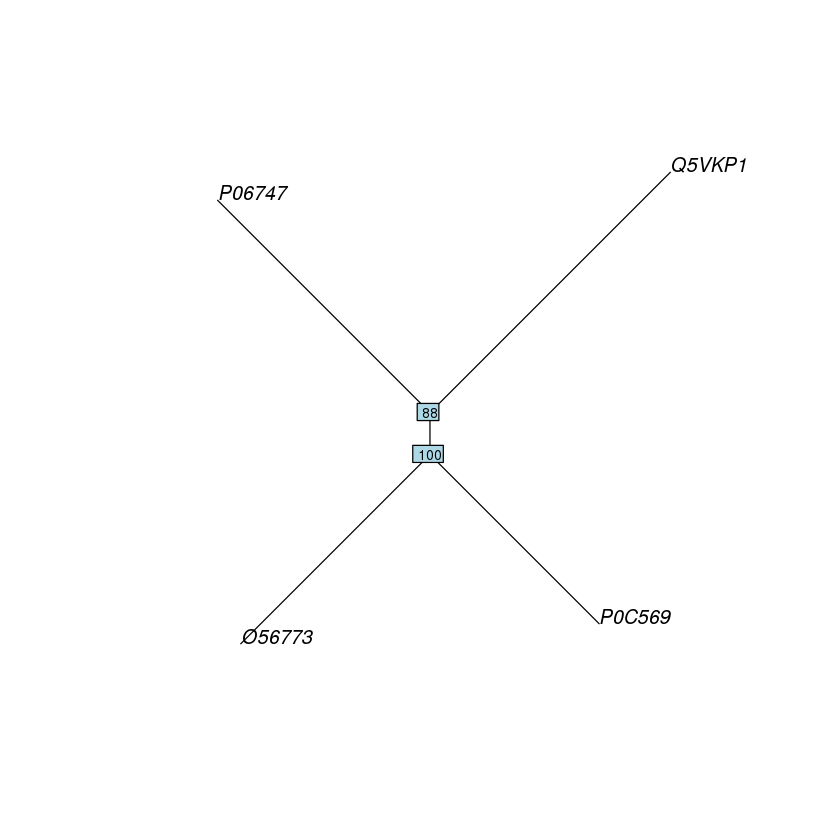

In [89]:
virusalntree <- unrootedNJtree(virusaln,type="protein")

Running bootstraps:       100 / 100
Calculating bootstrap values... done.


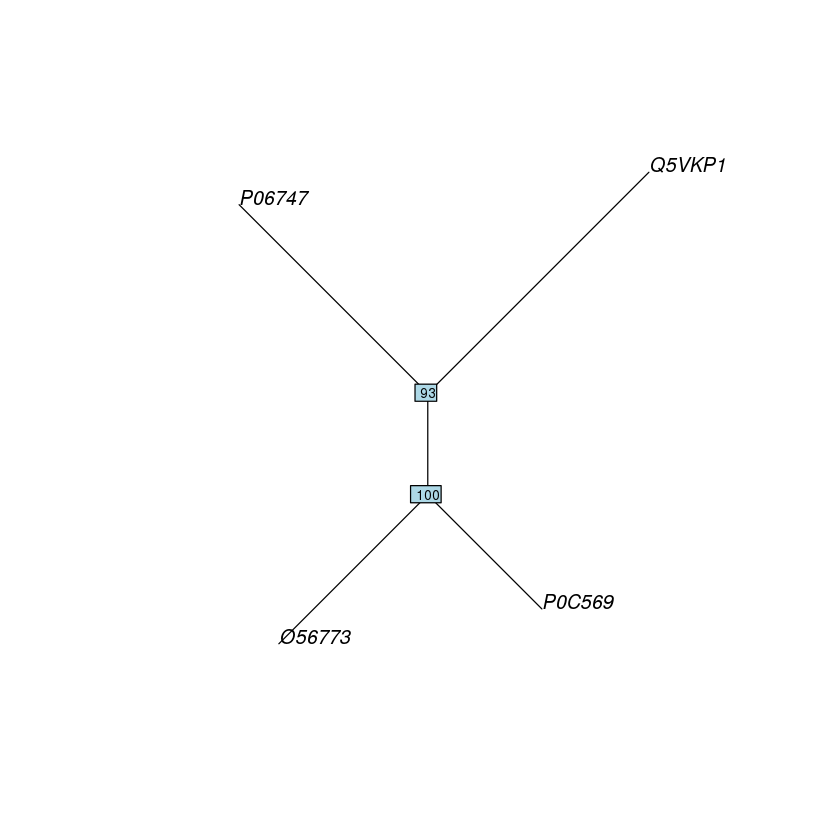

In [90]:
cleanedvirusalntree <- unrootedNJtree(cleanedvirusaln,type="protein")

### Building a rooted phylogenetic tree for protein sequences

In [115]:
seqnames <- c("Q10572","XP_003109757","Q8WS01","XP_020305433","XP_001893251","Q9VT99")
seqs <- retrieveseqs("protein",seqnames)

In [116]:
seqs

$Q10572
  [1] "M" "Q" "A" "L" "Y" "Q" "L" "S" "A" "T" "G" "A" "Q" "Q" "Q" "N" "Q" "Q"
 [19] "I" "P" "I" "G" "L" "S" "N" "S" "L" "L" "Y" "Q" "Q" "L" "A" "A" "H" "Q"
 [37] "Q" "I" "A" "A" "Q" "Q" "H" "Q" "Q" "Q" "L" "A" "V" "S" "A" "A" "H" "Q"
 [55] "T" "Q" "N" "N" "I" "M" "L" "A" "T" "S" "A" "P" "S" "L" "I" "N" "H" "M"
 [73] "E" "N" "S" "T" "D" "G" "K" "V" "K" "D" "D" "P" "N" "S" "D" "Y" "D" "L"
 [91] "Q" "L" "S" "I" "Q" "Q" "Q" "L" "A" "A" "A" "A" "Q" "A" "A" "Q" "M" "G"
[109] "Q" "T" "Q" "I" "G" "P" "Q" "I" "V" "G" "Q" "Q" "G" "Q" "P" "V" "V" "A"
[127] "T" "T" "A" "G" "S" "T" "N" "G" "S" "A" "A" "V" "T" "Q" "P" "D" "P" "S"
[145] "T" "S" "S" "G" "P" "D" "G" "P" "K" "R" "L" "H" "V" "S" "N" "I" "P" "F"
[163] "R" "F" "R" "D" "P" "D" "L" "K" "T" "M" "F" "E" "K" "F" "G" "V" "V" "S"
[181] "D" "V" "E" "I" "I" "F" "N" "E" "R" "G" "S" "K" "G" "F" "G" "F" "V" "T"
[199] "M" "E" "R" "P" "Q" "D" "A" "E" "R" "A" "R" "Q" "E" "L" "H" "G" "S" "M"
[217] "I" "E" "G" "R" "K" "I" "E" "V" "N" "C" "A" "T" "A" "R" "V" "H" "S" "K"
[235] "K" "V" "K" "P" "T" "G" "G" "I" "L" "D" "Q" "M" "N" "P" "L" "M" "A" "Q"
[253] "S" "A" "L" "A" "A" "Q" "A" "Q" "M" "N" "R" "A" "L" "L" "L" "R" "S" "P"
[271] "L" "V" "A" "Q" "S" "L" "L" "G" "R" "G" "A" "A" "L" "I" "P" "G" "M" "Q"
[289] "Q" "P" "A" "F" "Q" "L" "Q" "A" "A" "L" "A" "G" "N" "P" "L" "A" "Q" "L"
[307] "Q" "G" "Q" "P" "L" "L" "F" "N" "A" "A" "A" "L" "Q" "T" "N" "A" "L" "Q"
[325] "Q" "S" "A" "F" "G" "M" "D" "P" "A" "A" "V" "Q" "A" "A" "L" "L" "A" "N"
[343] "E" "Q" "A" "R" "F" "Q" "L" "A" "A" "A" "A" "A" "Q" "G" "N" "E" "Y" "I"
[361] "M" "Y" "H" "Q" "A" "K" "Q" "Q" "E" "L" "P" "G" "R" "I" "P" "S" "S" "G"
[379] "N" "A" "S" "A" "F" "G" "E" "Q" "Y" "L" "S" "N" "A" "L" "A" "T" "A" "S"
[397] "L" "P" "S" "Y" "Q" "M" "N" "P" "A" "L" "R" "T" "L" "N" "R" "F" "T" "P"
[415] "Y"

$XP_003109757
  [1] "M" "Q" "T" "L" "Y" "Q" "L" "S" "A" "S" "G" "A" "A" "Q" "Q" "N" "Q" "Q"
 [19] "I" "P" "I" "G" "L" "G" "N" "S" "L" "L" "Y" "Q" "Q" "L" "A" "A" "Q" "Q"
 [37] "Q" "I" "A" "V" "Q" "Q" "H" "Q" "Q" "Q" "L" "A" "V" "S" "A" "A" "H" "Q"
 [55] "S" "Q" "N" "N" "I" "M" "L" "A" "T" "S" "A" "P" "S" "L" "I" "N" "H" "I"
 [73] "E" "N" "P" "T" "E" "S" "K" "V" "K" "D" "D" "P" "N" "S" "D" "Y" "D" "L"
 [91] "Q" "I" "S" "I" "Q" "Q" "H" "M" "A" "A" "A" "A" "Q" "A" "A" "Q" "L" "G"
[109] "P" "Q" "M" "G" "Q" "P" "Q" "I" "G" "P" "Q" "I" "V" "G" "Q" "Q" "G" "Q"
[127] "Q" "V" "A" "V" "T" "T" "A" "G" "P" "T" "N" "G" "T" "S" "A" "V" "T" "Q"
[145] "P" "D" "P" "S" "T" "S" "S" "G" "P" "D" "G" "P" "K" "R" "L" "H" "V" "S"
[163] "N" "I" "P" "F" "R" "F" "R" "D" "P" "D" "L" "K" "T" "M" "F" "E" "K" "F"
[181] "G" "V" "V" "S" "D" "V" "E" "I" "I" "F" "N" "E" "R" "G" "S" "K" "G" "F"
[199] "G" "F" "V" "T" "M" "E" "R" "P" "Q" "D" "A" "E" "R" "A" "R" "Q" "E" "L"
[217] "H" "G" "S" "M" "I" "E" "G" "R" "K" "I" "E" "V" "N" "C" "A" "T" "A" "R"
[235] "V" "H" "S" "K" "K" "V" "K" "P" "A" "G" "G" "I" "L" "D" "T" "M" "N" "P"
[253] "L" "M" "A" "Q" "S" "A" "M" "A" "A" "Q" "A" "Q" "M" "N" "R" "A" "F" "L"
[271] "L" "R" "S" "P" "L" "V" "A" "Q" "S" "L" "L" "G" "R" "G" "A" "G" "L" "I"
[289] "S" "G" "I" "Q" "Q" "P" "N" "A" "F" "Q" "L" "Q" "A" "A" "L" "A" "A" "N"
[307] "P" "L" "A" "Q" "L" "Q" "G" "Q" "P" "L" "L" "F" "N" "A" "A" "A" "L" "Q"
[325] "S" "S" "A" "L" "Q" "Q" "S" "A" "F" "G" "M" "D" "Q" "A" "T" "V" "Q" "A"
[343] "A" "L" "L" "A" "N" "E" "Q" "A" "R" "L" "Q" "F" "A" "A" "A" "A" "A" "Q"
[361] "G" "N" "E" "Y" "L" "M" "Y" "H" "Q" "A" "K" "Q" "Q" "E" "L" "P" "G" "R"
[379] "I" "P" "S" "A" "G" "N" "A" "S" "A" "F" "G" "E" "Q" "Y" "L" "G" "N" "A"
[397] "L" "S" "A" "A" "S" "L" "S" "S" "Y" "Q" "I" "N" "P" "A" "L" "R" "T" "L"
[415] "N" "R" "F" "T" "P" "Y"

$Q8WS01
  [1] "R" "V" "E" "T" "G" "V" "L" "K" "P" "G" "M" "V" "V" "T" "F" "A" "P" "A"
 [19] "N" "L" "X" "T" "E" "V" "K" "S" "V" "E" "M" "H" "H" "E" "A" "L" "T" "E"
 [37] "A" "V" "P" "G" "D" "N" "V" "G" "F" "N" "I" "K" "N" "V" "S" "V" "K" "E"
 [55] "L" "R" "R" "G" "Y" "V" "A" "G" "D" "S" "K" "N" "N" "P" "P" "R" "G" "A"
 [73] "A" "D" "F" "T" "A" "Q

In [117]:
write.fasta(seqs, seqnames, file="fox1.fasta")

In [118]:
fox1aln  <- read.alignment(file = "fox1.phy", format = "phylip")

In [122]:
rootedNJtree <- function(alignment, theoutgroup, type) {
     # load the ape and seqinR packages:
     require("ape")
     require("seqinr")
     # define a function for making a tree:
     makemytree <- function(alignmentmat, outgroup=`theoutgroup`)
     {
        alignment <- ape::as.alignment(alignmentmat)
        if      (type == "protein")
        {
           mydist <- dist.alignment(alignment)
        }
        else if (type == "DNA")
        {
           alignmentbin <- as.DNAbin(alignment)
           mydist <- dist.dna(alignmentbin)
        }
        mytree <- nj(mydist)
        mytree <- makeLabel(mytree, space="") # get rid of spaces in tip names.
        myrootedtree <- root(mytree, outgroup, r=TRUE)
        return(myrootedtree)
     }
     # infer a tree
     mymat  <- as.matrix.alignment(alignment)
     myrootedtree <- makemytree(mymat, outgroup=theoutgroup)
     # bootstrap the tree
     myboot <- boot.phylo(myrootedtree, mymat, makemytree)
     # plot the tree:
     plot.phylo(myrootedtree, type="p")  # plot the rooted phylogenetic tree
     nodelabels(myboot,cex=0.7)          # plot the bootstrap values
     myrootedtree$node.label <- myboot   # make the bootstrap values be the node labels
     return(myrootedtree)
  }

Running bootstraps:       100 / 100
Calculating bootstrap values... done.


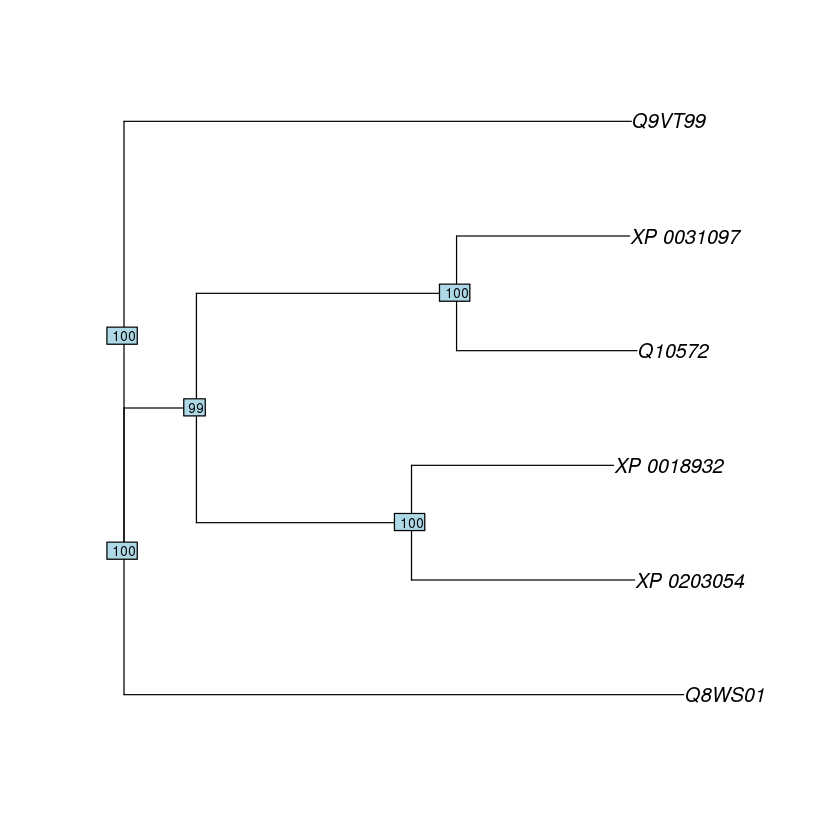

In [123]:
fox1alntree <- rootedNJtree(fox1aln, "Q9VT99",type="protein")

### Building a phylogenetic tree for DNA or mRNA sequences

Running bootstraps:       100 / 100
Calculating bootstrap values... done.


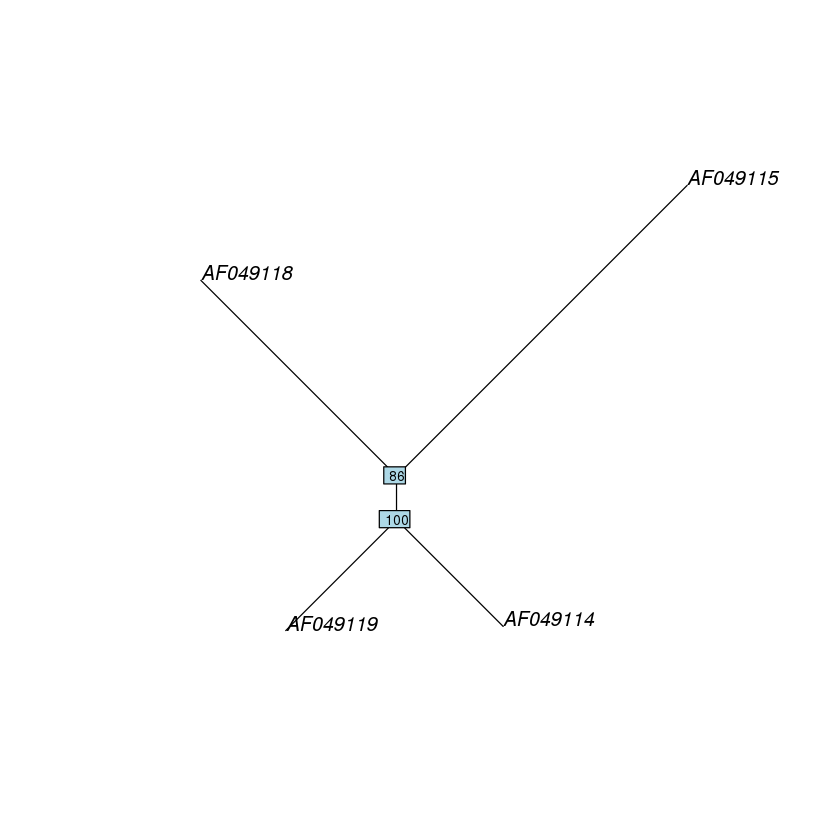

In [124]:
virusmRNAaln  <- read.alignment(file = "virusmRNA.phy", format = "phylip")
virusmRNAalntree <- unrootedNJtree(virusmRNAaln, type="DNA")
